In [ ]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


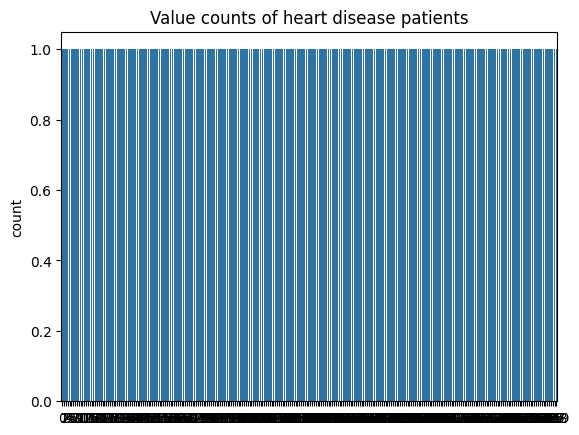

In [ ]:
df=pd.read_csv('/content/heart_v2.csv')
print(df.head())
sns.countplot(df['heart disease'])
plt.title('Value counts of heart disease patients')
plt.show()

In [ ]:
x= df.drop('heart disease',axis=1)
y=df['heart disease']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
x_train.shape,x_test.shape

((189, 4), (81, 4))

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Importing the necessary class
import time

classifier_rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    n_estimators=100,
    oob_score=True
)
start_time = time.time()
classifier_rf.fit(x_train, y_train)
end_time = time.time()
print(f"Training completed in {(end_time - start_time):.4f} seconds")


Training completed in 0.8869 seconds


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=classifier_rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[36 13]
 [15 17]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        49
           1       0.57      0.53      0.55        32

    accuracy                           0.65        81
   macro avg       0.64      0.63      0.63        81
weighted avg       0.65      0.65      0.65        81



In [ ]:
from sklearn.ensemble import RandomForestClassifier # Importing the necessary class
import time

classifier_rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    n_estimators=100,
    oob_score=True
)
start_time = time.time()
classifier_rf.fit(x_train, y_train)
end_time = time.time()
print(f"Training completed in {(end_time - start_time):.4f} seconds")


Training completed in 0.2872 seconds


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier_rf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[36 13]
 [15 17]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        49
           1       0.57      0.53      0.55        32

    accuracy                           0.65        81
   macro avg       0.64      0.63      0.63        81
weighted avg       0.65      0.65      0.65        81



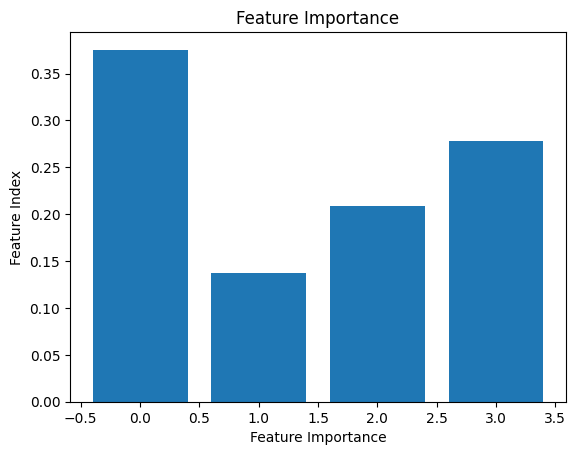

In [ ]:
importances= classifier_rf.feature_importances_
plt.bar(range(len(importances)),importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators':[100,200],
    'max_depth':[None,10,20],
}



In [ ]:
model=RandomForestRegressor()

In [ ]:

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)  # Now x_train and y_train are defined

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]})

In [ ]:
print("Best Cv Score:",grid_search.best_score_)

Best Cv Score: 0.03369299942241906


In [ ]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=10)

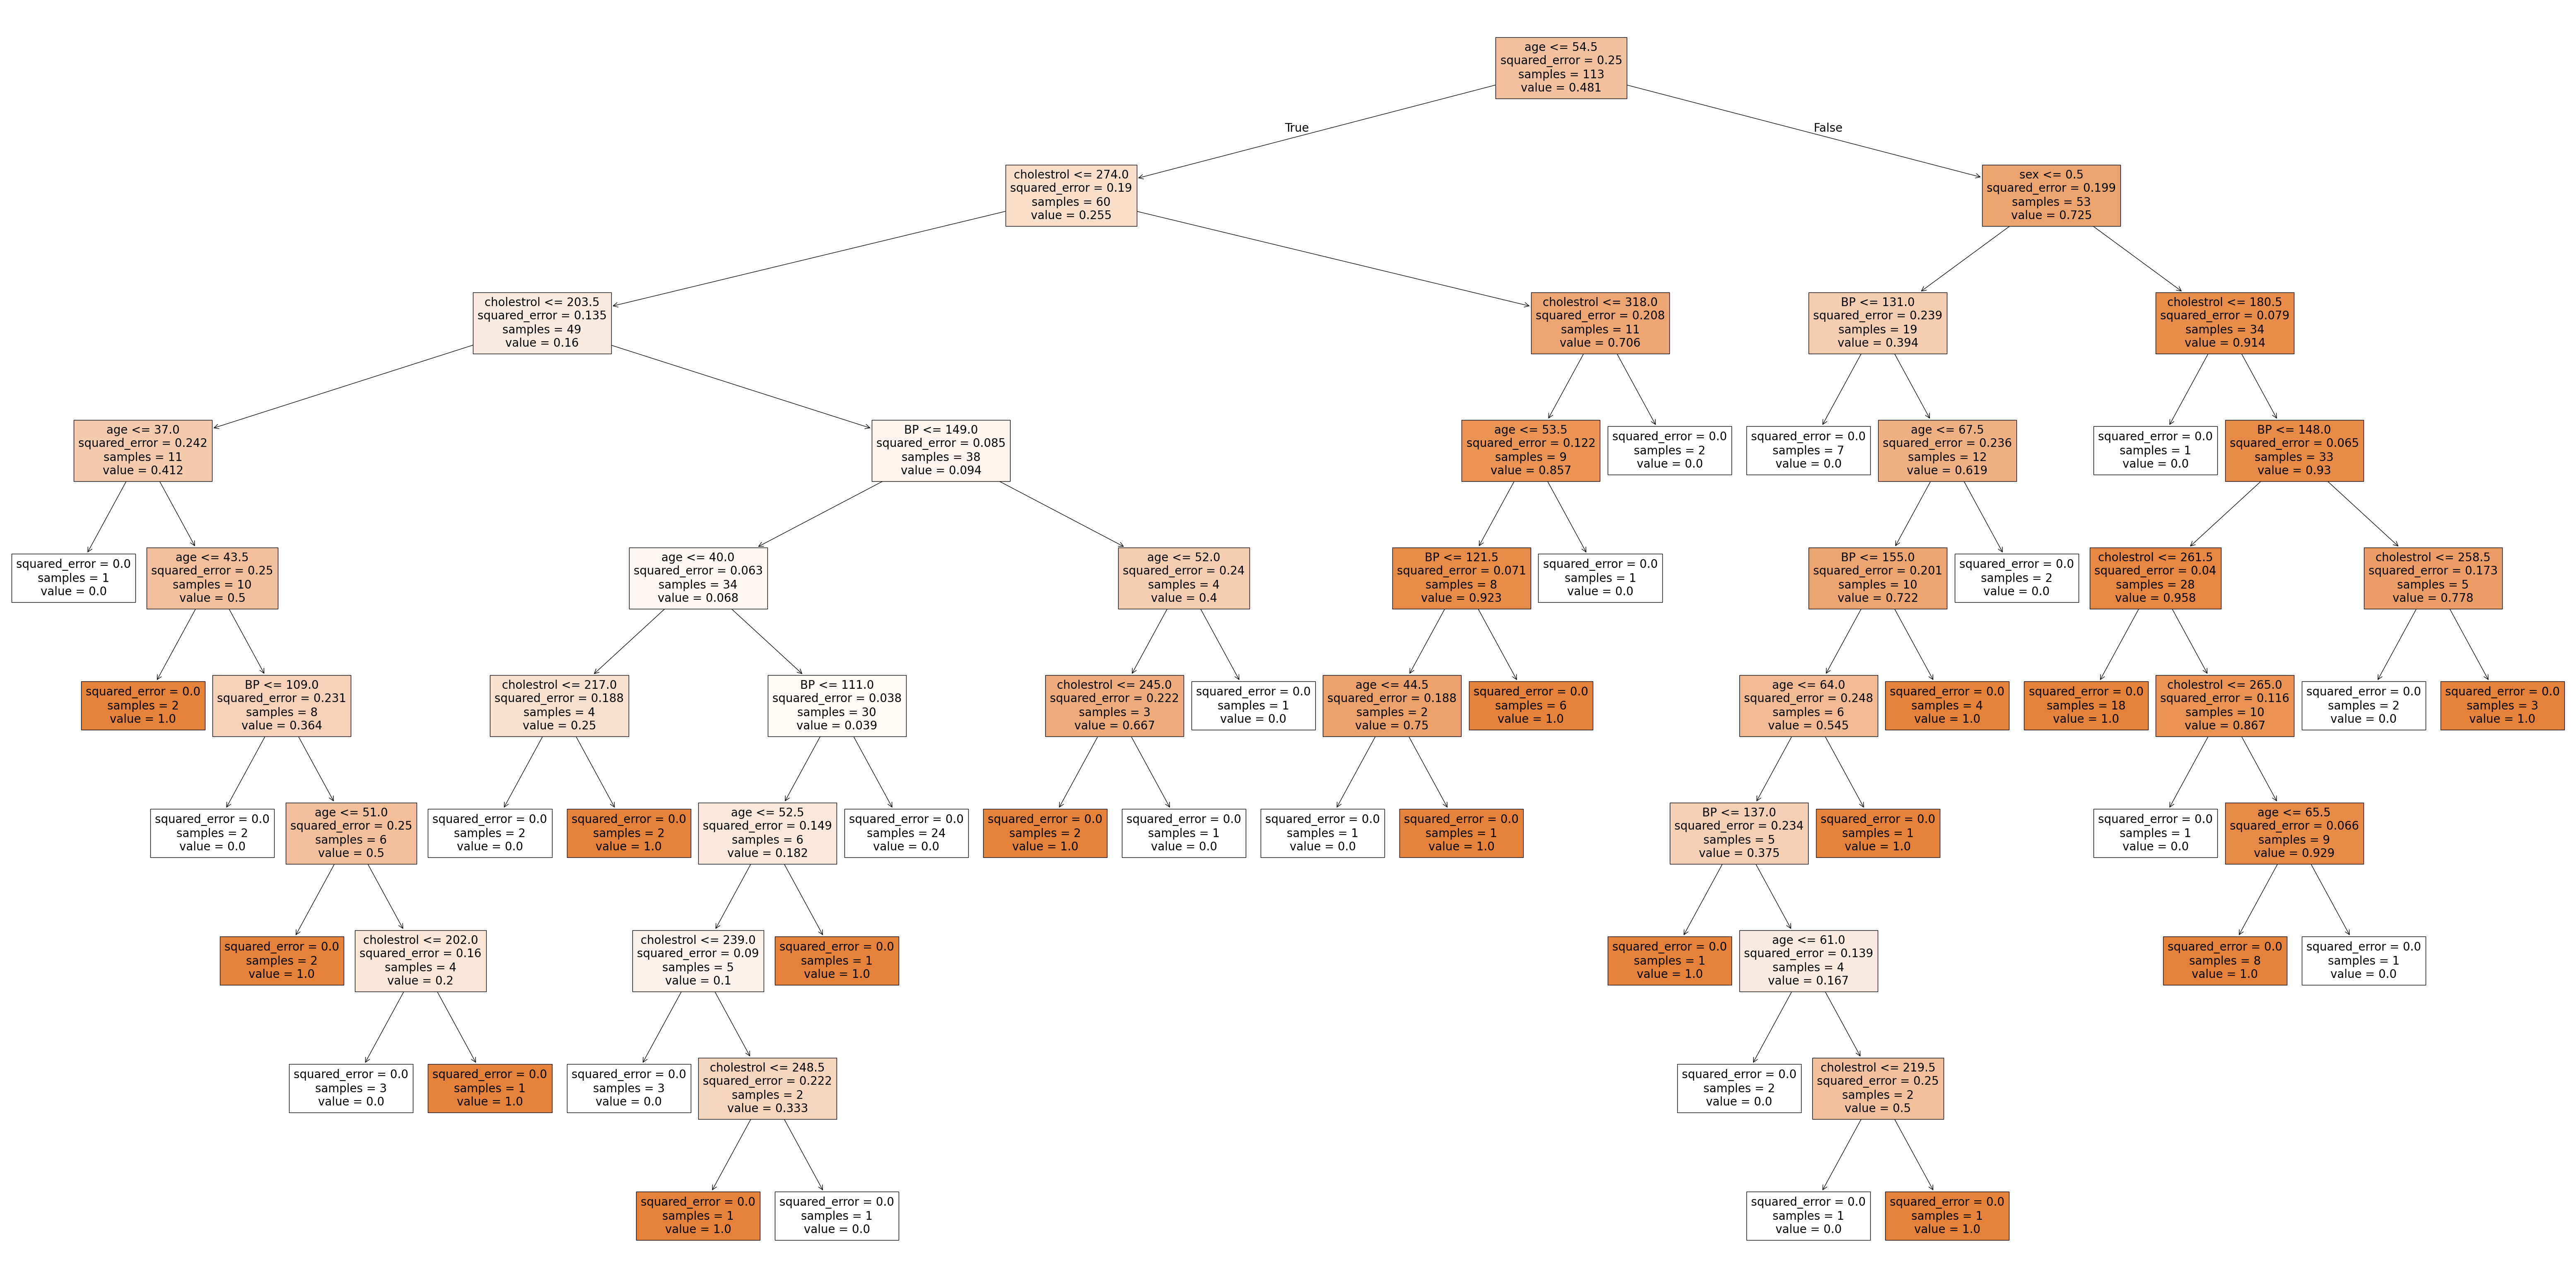

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],feature_names=x.columns,filled=True);

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)

In [ ]:
rf.fit(x_train,y_train)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
random_grid_param_grid={
    'n_estimators':np.arange(50,201,10),
    'max_depth':[None]+ list(np.arange(5,30,5)),
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}


In [ ]:
random_search=RandomizedSearchCV(estimator=rf,param_distributions=random_grid_param_grid,n_iter=20,cv=3,verbose=1,n_jobs=1,random_state=42)
random_search.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [None, np.int64(5),
                                                      np.int64(10),
                                                      np.int64(15),
                                                      np.int64(20),
                                                      np.int64(25)],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200])},
                   random_state=42, verbose=1)

In [ ]:
print("Best Parameters(Random Search):",random_search.best_params_)
print("Validation Score:",random_search.best_score_)

Best Parameters(Random Search): {'n_estimators': np.int64(140), 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': np.int64(10)}
Validation Score: 0.6878306878306879


In [ ]:
y_pred=random_search.predict(x_test)
print("Test Accuracy(Random Search):",accuracy_score(y_test,y_pred))

Test Accuracy(Random Search): 0.6666666666666666
